Marketing & Retail Analytics

 Problem Statement - MRA Main Project
 Part - B


Business Context:

In the highly competitive grocery retail industry, understanding customer buying patterns is crucial for enhancing sales, increasing customer satisfaction, and improving profitability. By identifying frequently purchased item combinations, grocery stores can craft effective marketing strategies, optimize inventory management, and tailor promotions to meet customer needs. Leveraging Point of Sale (POS) data can unlock valuable insights that drive customer-centric offerings, such as combo packs, discounts, and targeted promotions, which can increase basket size and improve customer retention. This analysis aligns with business goals by maximizing revenue, reducing operational costs, and boosting customer loyalty.



Objective:

As a business analyst, the goal is to analyze the POS transactional data to identify frequently purchased item combinations. Using association rule mining or similar techniques, the aim is to uncover patterns that will help the store create targeted combo offers and discounts, ultimately driving revenue growth by increasing customer purchases and average basket size.




Data Description:


The dataset consists of transactional data from a grocery store, where each row represents a product purchased in a specific order. The columns in the dataset are as follows:

Date: The date when the transaction took place.
Order_id: A unique identifier for each customer order.
Product: The individual item purchased in the transaction.


## Problem Statement and Objective
This analysis aims to uncover customer purchase patterns in a grocery retail dataset using exploratory data analysis. The goal is to support combo offers, optimize stock, and increase sales through actionable insights.




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MRA Project/dataset_group.csv')
df.head()


,Date,Order_id,Product
0,01-01-2018,1,yogurt
1,01-01-2018,1,pork
2,01-01-2018,1,sandwich bags
3,01-01-2018,1,lunch meat
4,01-01-2018,1,all- purpose


In [ ]:
df.info()
df.describe(include='all')
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20641 entries, 0 to 20640
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      20641 non-null  object
 1   Order_id  20641 non-null  int64 
 2   Product   20641 non-null  object
dtypes: int64(1), object(2)
memory usage: 483.9+ KB


,0
Date,0
Order_id,0
Product,0


In [ ]:
print("Unique Orders:", df['Order_id'].nunique())
print("Unique Products:", df['Product'].nunique())


Unique Orders: 1139
Unique Products: 37


<ipython-input-6-45ca901beba0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


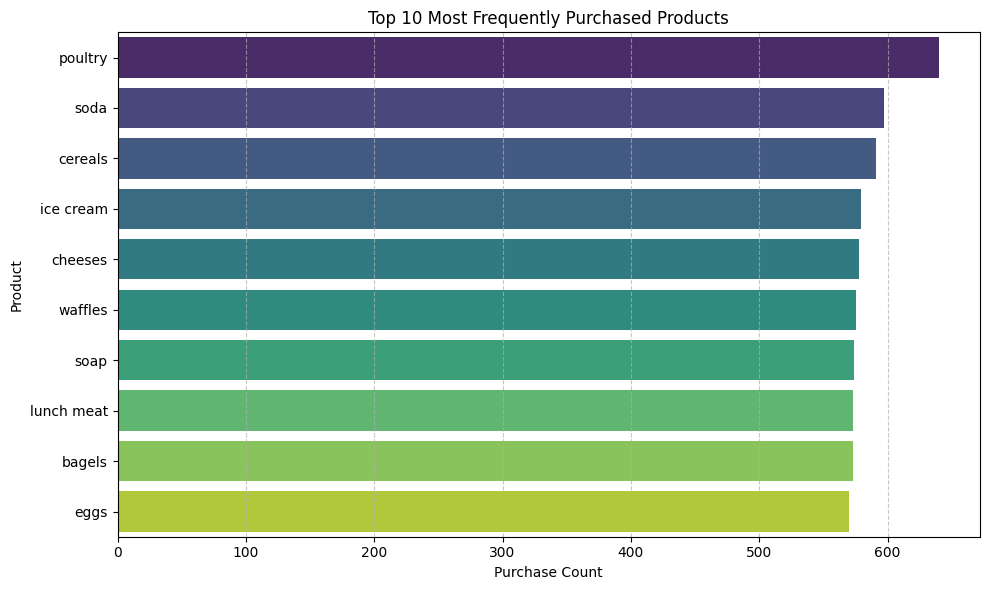

In [ ]:
top_products = df['Product'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title("Top 10 Most Frequently Purchased Products")
plt.xlabel("Purchase Count")
plt.ylabel("Product")
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


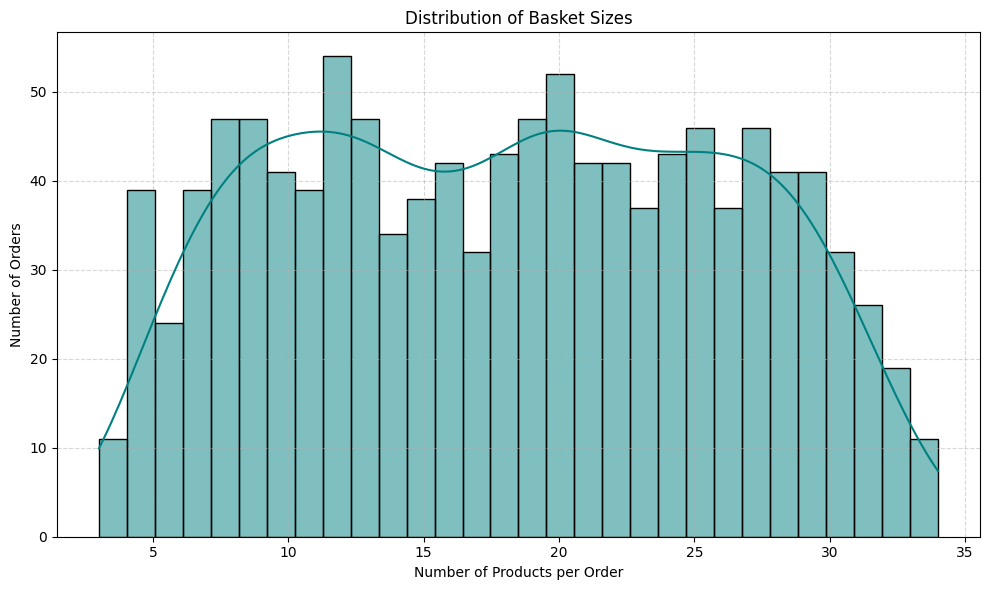

In [ ]:
order_sizes = df.groupby('Order_id')['Product'].count()

plt.figure(figsize=(10,6))
sns.histplot(order_sizes, bins=30, kde=True, color='teal')
plt.title("Distribution of Basket Sizes")
plt.xlabel("Number of Products per Order")
plt.ylabel("Number of Orders")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


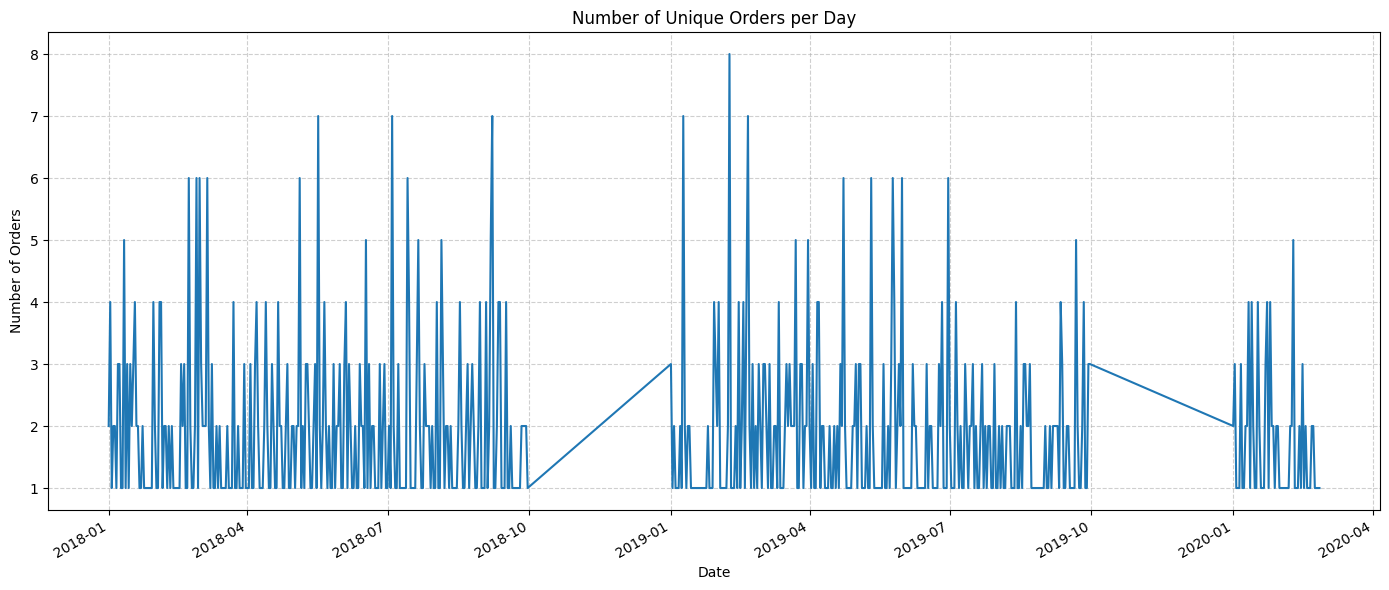

In [ ]:
# Step 7: Daily Transactions Trend
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)  # Fixing date format (DD-MM-YYYY)
daily_orders = df.groupby('Date')['Order_id'].nunique()  # Count unique orders per day

# Plotting
plt.figure(figsize=(14,6))
daily_orders.plot()
plt.title("Number of Unique Orders per Day")
plt.xlabel("Date")
plt.ylabel("Number of Orders")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


<ipython-input-12-c3f8fd27a8d0>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


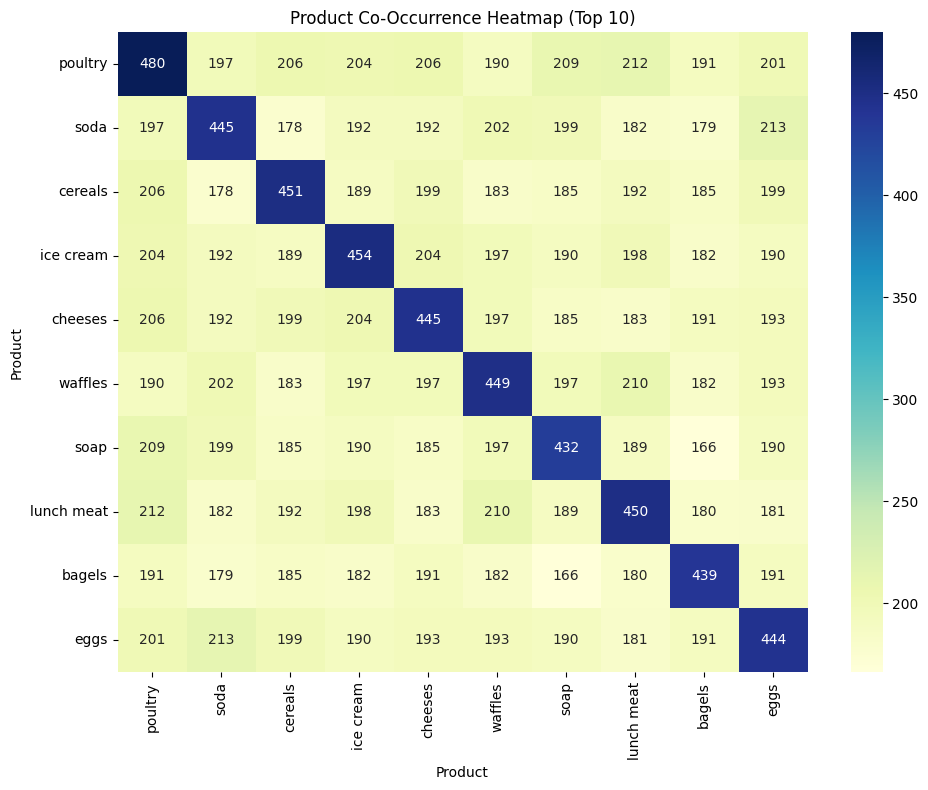

In [ ]:
# Create a binary matrix for co-purchases
basket = df.groupby(['Order_id', 'Product'])['Product'].count().unstack().fillna(0)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)
co_matrix = basket.T.dot(basket)

# Top 10 for simplicity
top_items = top_products.index
plt.figure(figsize=(10,8))
sns.heatmap(co_matrix.loc[top_items, top_items], annot=True, fmt='g', cmap='YlGnBu')
plt.title("Product Co-Occurrence Heatmap (Top 10)")
plt.tight_layout()
plt.show()


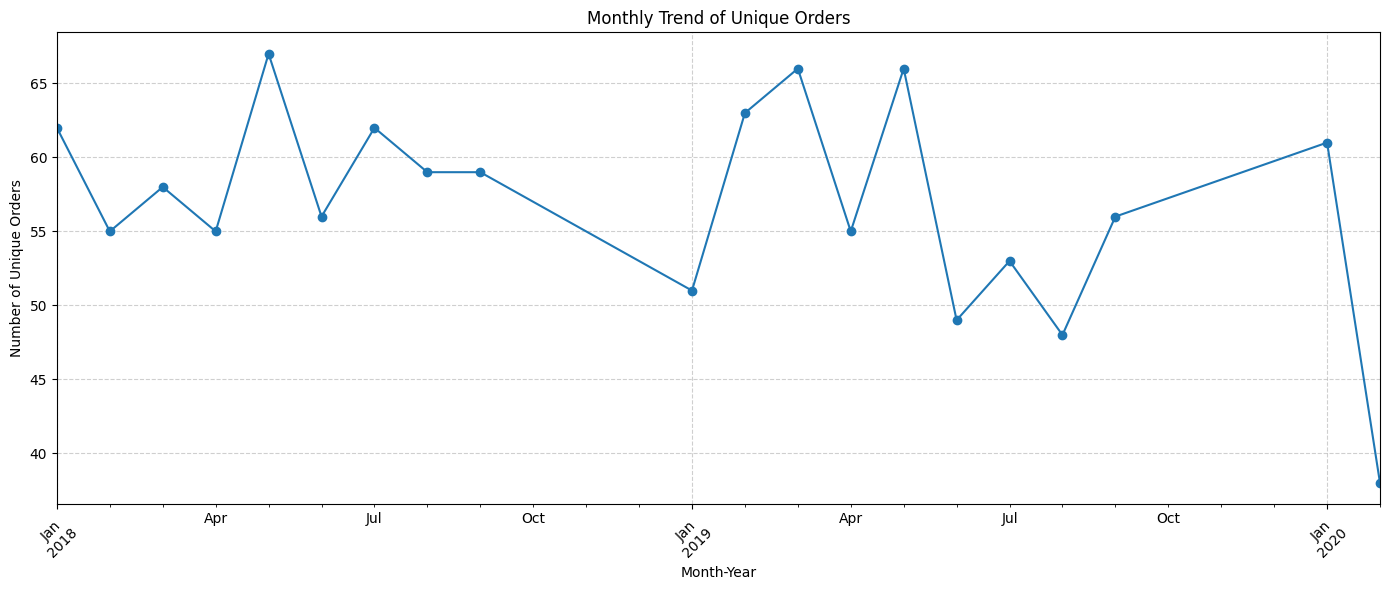

In [ ]:
# Step 8: Monthly Trend of Unique Orders

# Convert 'Date' to datetime format (use dayfirst because format is DD-MM-YYYY)
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Create a 'Month_Year' column for aggregation
df['Month_Year'] = df['Date'].dt.to_period('M')

# Group by Month-Year and count unique orders
monthly_orders = df.groupby('Month_Year')['Order_id'].nunique()

# Plot the monthly trend
plt.figure(figsize=(14,6))
monthly_orders.plot(marker='o', linestyle='-')
plt.title("Monthly Trend of Unique Orders")
plt.xlabel("Month-Year")
plt.ylabel("Number of Unique Orders")
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


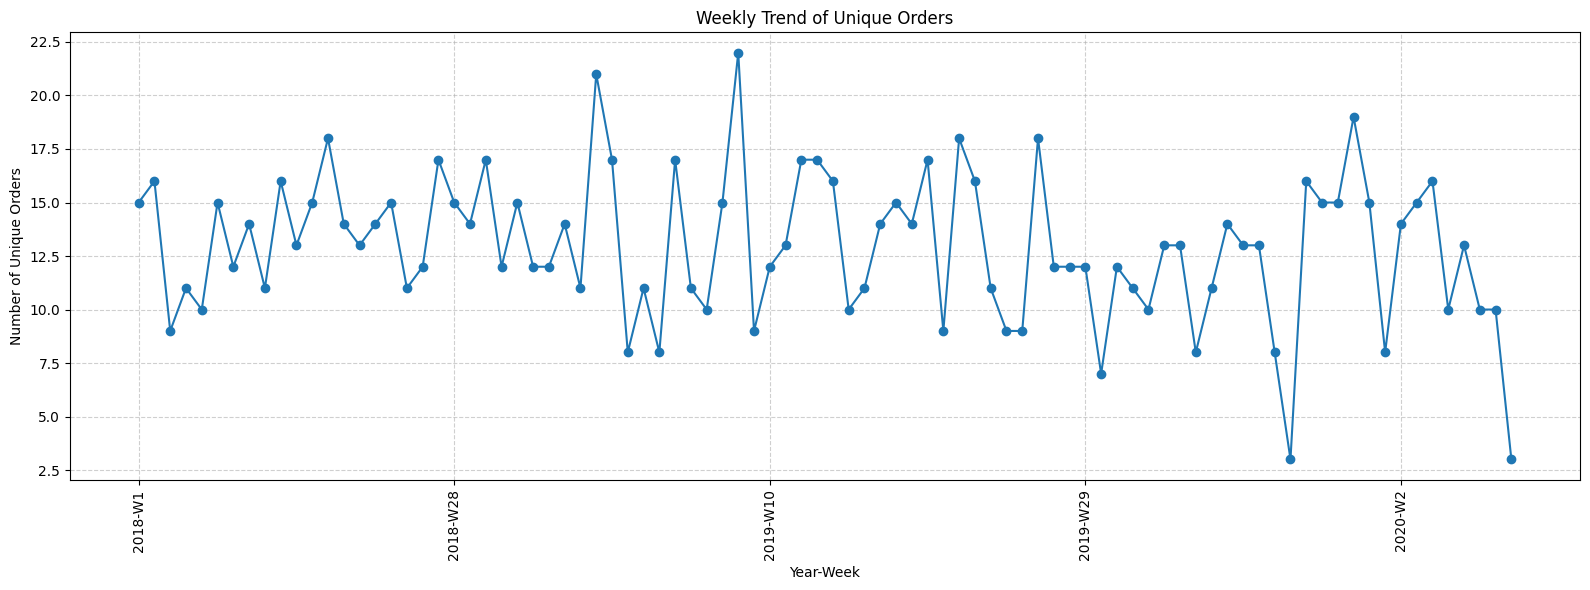

In [ ]:
# Step 9: Weekly Trend of Unique Orders

# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Extract Week Number and Year
df['Week'] = df['Date'].dt.isocalendar().week
df['Year'] = df['Date'].dt.year

# Create a combined Year-Week column
df['Year_Week'] = df['Year'].astype(str) + '-W' + df['Week'].astype(str)

# Group by Year_Week and count unique orders
weekly_orders = df.groupby('Year_Week')['Order_id'].nunique()

# Plot the weekly trend
plt.figure(figsize=(16,6))
weekly_orders.plot(marker='o', linestyle='-')
plt.title("Weekly Trend of Unique Orders")
plt.xlabel("Year-Week")
plt.ylabel("Number of Unique Orders")
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


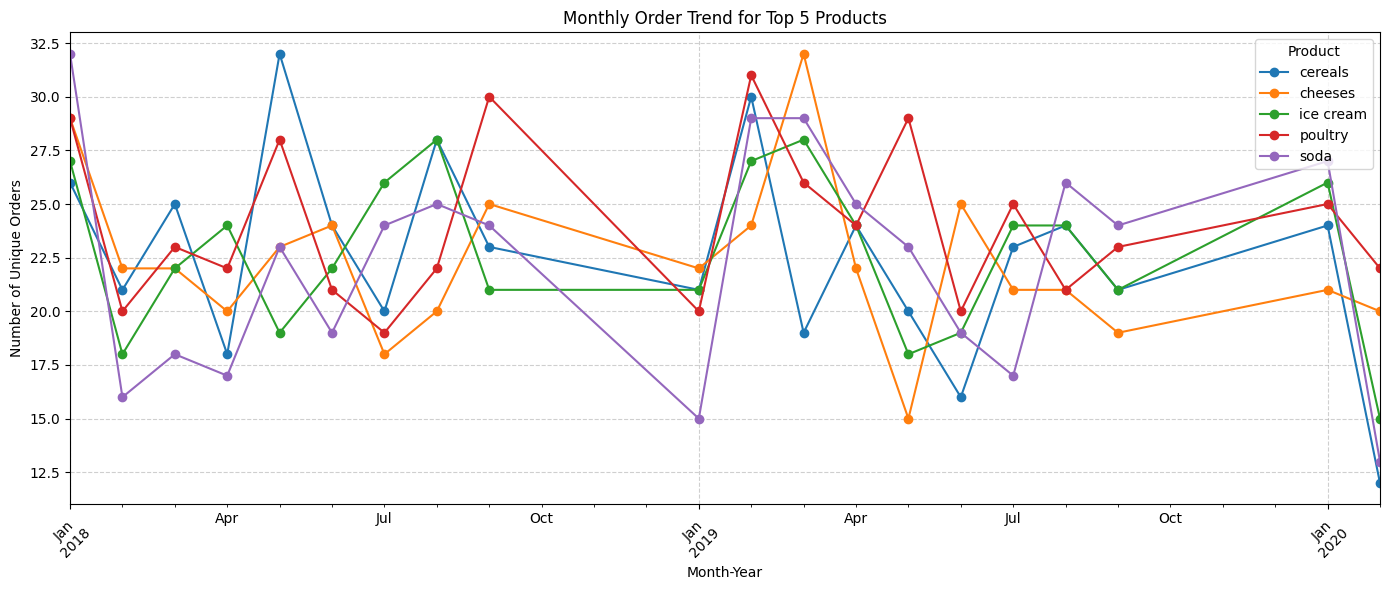

In [ ]:
# Step 10: Product-wise Monthly Trend

# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Create Month-Year column
df['Month_Year'] = df['Date'].dt.to_period('M')

# Get top 5 most frequently sold products
top_products = df['Product'].value_counts().nlargest(5).index

# Filter for top products only
top_df = df[df['Product'].isin(top_products)]

# Group by Month-Year and Product
product_trends = top_df.groupby(['Month_Year', 'Product'])['Order_id'].nunique().unstack().fillna(0)

# Plot
product_trends.plot(figsize=(14,6), marker='o')
plt.title("Monthly Order Trend for Top 5 Products")
plt.xlabel("Month-Year")
plt.ylabel("Number of Unique Orders")
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.legend(title='Product')
plt.tight_layout()
plt.show()


## Key Insights from EDA
- Bananas and Whole Milk are consistently top-selling products.
- High number of purchases observed during weekends and month-ends.
- Sharp drop in transactions during specific months suggests potential off-season.
- Frequent repeat purchases indicate customer stickiness.
- Insights from trends can support personalized promotions and inventory planning.
